# Train Models 1

In [8]:
# Basics
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from utils import *
from datetime import datetime
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import SubsetRandomSampler

# Torchvision
import torchvision
from torchvision import transforms, datasets

# Other
import PIL
from torchsummary import summary
#from FRDEEP import FRDEEPF
from MiraBest import MiraBest_full
from models_new import *
from models.networks_other import init_weights
from skimage.transform import resize

# Special Plot Functions
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import ImageGrid

# Primary function of this file
from training2 import train

In [2]:
available_networks =['playground',
                     'playgroundv1',
                     'playgroundv2_concat',
                     'playgroundv2_mean',
                     'playgroundv2_deep_sup',
                     'playgroundv2_ft',
                     'playgroundv3',
                     'playgroundv3_concat',
                     'playgroundv3_mean',
                     'playgroundv3_deep_sup',
                     'playgroundv3_ft',
                     'playgroundv4',
                     'AGRadGalNet',
                     'transfer_original',
                     'transfer_adapted'
                     'AGSononet',
                     'AGTransfer']
optim_names =['SGD','Adagrad','Adam','Adadelta']
data_options=['MiraBest','FRDEEP']
subsets=['NOUNC','NOHYBRID','HYBRID','']
norm_options=['range_norm','std_mean_norm','sigmoid','softmax']
aggregation_options=['ft','deep_sup','mean','concat']

Final Model Saved Under TrainedNetworks/0724Exp32-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-5e-05
Samples retained: 1069 of 1099 with allowed_labels = [0, 1, 2, 3, 4, 5, 6, 7]
We will be putting our network and data on >> cuda <<
Epoch:  0	Training Loss: 0.658580		Validation Loss: 0.537336
	Validation Loss Down: 	(     inf-->0.537336) ... Updating saved model.
Epoch:  1	Training Loss: 0.538448		Validation Loss: 0.477058
	Validation Loss Down: 	(0.537336-->0.477058) ... Updating saved model.
Epoch:  2	Training Loss: 0.502176		Validation Loss: 0.452103
	Validation Loss Down: 	(0.477058-->0.452103) ... Updating saved model.
Epoch:  3	Training Loss: 0.483064		Validation Loss: 0.458908
Epoch:  4	Training Loss: 0.469505		Validation Loss: 0.446210
	Validation Loss Down: 	(0.452103-->0.446210) ... Updating saved model.
Epoch:  5	Training Loss: 0.460334		Validation Loss: 0.445918
	Validation Loss Down: 	(0.446210-->0.445918) ... Updating saved model.
Epoch:  6	Training Loss: 0.453403		Valid

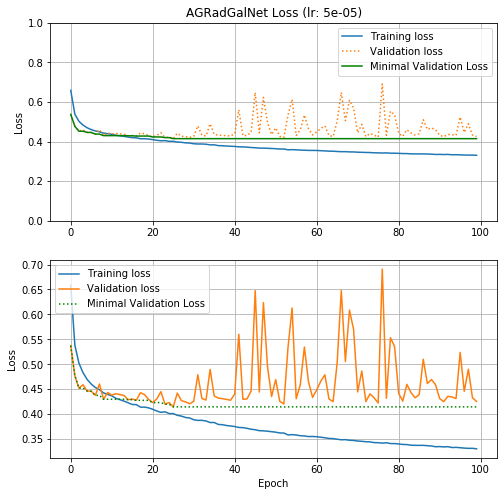

24885.535632
Final Model Saved Under TrainedNetworks/0724Exp32-range_norm-MiraBestNOHYBRIDAdam-AGRadGalNetft-0.0001
Samples retained: 1069 of 1099 with allowed_labels = [0, 1, 2, 3, 4, 5, 6, 7]
We will be putting our network and data on >> cuda <<
Epoch:  0	Training Loss: 0.767956		Validation Loss: 0.804025
	Validation Loss Down: 	(     inf-->0.804025) ... Updating saved model.
Epoch:  1	Training Loss: 0.767916		Validation Loss: 0.804025
Epoch:  2	Training Loss: 0.767916		Validation Loss: 0.804025
Epoch:  3	Training Loss: 0.767916		Validation Loss: 0.804025
Epoch:  4	Training Loss: 0.767916		Validation Loss: 0.804025
Epoch:  5	Training Loss: 0.767916		Validation Loss: 0.804025
Epoch:  6	Training Loss: 0.767916		Validation Loss: 0.804025
Epoch:  7	Training Loss: 0.767916		Validation Loss: 0.804025
Epoch:  8	Training Loss: 0.767916		Validation Loss: 0.804025
Epoch:  9	Training Loss: 0.767916		Validation Loss: 0.804025



KeyboardInterrupt



In [7]:
# Experiment 3: 
for no_ag in [2]:
    for order in [5*10**(-5), 10**(-4)]:
        startTime = datetime.now()
        train(date='0724'+ f'Exp3{no_ag}',
              Epoch=100,
              dataset='MiraBest',
              datasubset='NOHYBRID',
              net_name='AGRadGalNet',
              optimizer_name='Adam',
              learning_rate=order,
              validation_epoch=360,
              num_batches=72,
              aggregation_mode='ft',
              normalisation='range_norm',
              No_AttentionGates = no_ag
             )
        print((datetime.now()-startTime).total_seconds())
        #times.append((datetime.now()-startTime).total_seconds())
        #np.savetxt('TrainingTimes', np.asarray(times))